# NCEI Weather Data Analysis and Plotting

In This NoteBook are some Data Science work on the weather data in the United States

The data comes from a subset of The National Centers for Environmental Information (NCEI) [Daily Global Historical Climatology Network](https://www1.ncdc.noaa.gov/pub/data/ghcn/daily/readme.txt) (GHCN-Daily).

In The next cells I perform python Pandas data analysis i loaded the dataset and cleaned the data to be ready for plotting i used matplotlib to plot the maximum and minmum temprature over the period of 2005-2014 and the this was plotted with 2 line plots after this i compared the data to the data of 2015 and added broken records in tempratue highs and lows in scatter plot

variables:

* **id** : station identification code
* **date** : date in YYYY-MM-DD format (e.g. 2012-01-24 = January 24, 2012)
* **element** : indicator of element type
    * TMAX : Maximum temperature (tenths of degrees C)
    * TMIN : Minimum temperature (tenths of degrees C)
* **value** : data value for element (tenths of degrees C) 

The data is near **Ann Arbor, Michigan, United States**

In [13]:
import pandas as pd
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as dates
from datetime import datetime as dtp

In [2]:
#The DataSet Before Cleaning
df = pd.read_csv('NCEI.csv')
df.head()

,ID,Date,Element,Data_Value
0,USW00094889,2014-11-12,TMAX,22
1,USC00208972,2009-04-29,TMIN,56
2,USC00200032,2008-05-26,TMAX,278
3,USC00205563,2005-11-11,TMAX,139
4,USC00200230,2014-02-27,TMAX,-106


In [3]:
#DataSet Cleaning With Pandas
#UNCOMMENT ANY FUNCTION CALL BELOW TO SEE THE DATAFRAME
def dataSet_Cleaning():
    df['Temprature'] = df['Data_Value'] / 10.0
    df['Date'] = pd.to_datetime(df['Date'],format="%Y-%m-%d")
    df['Year'] = df['Date'].dt.strftime("%Y")
    df['DayOfYear'] = df['Date'].dt.strftime("%m-%d")
    n_df = df[df['DayOfYear'] != '02/29']
 
    n_df.sort_values('Date',inplace=True)
    new_df = n_df.loc[:,'Temprature':]
    return new_df

def data_2005_2014():
    new_df = dataSet_Cleaning()
    new_df = new_df[new_df['Year'] < '2015']
    new_df = new_df.groupby('DayOfYear')['Temprature'].agg(['min','max']).reset_index()
    return new_df

def data_2015():
    
    df = dataSet_Cleaning()
    df = df[df['Year'] == '2015']
    df2 = data_2005_2014()
    df = df.groupby('DayOfYear')['Temprature'].agg(['max','min']).rename(columns={'max':'max2015','min':'min2015'}).reset_index()
    new_df = pd.merge(df,df2,how='outer',left_on='DayOfYear',right_on='DayOfYear')
    new_df['2015BrokenHigh'] = new_df['max2015'] > new_df['max']
    new_df['2015Brokenlow'] = new_df['min2015'] < new_df['min']
    new_df = new_df[(new_df['2015BrokenHigh'] == True ) | (new_df['2015Brokenlow'] == True)]
    
    return new_df
#dataSet_Cleaning()
#data_2005_2014()
#data_2015()

<module 'matplotlib.pyplot' from 'c:\\Users\\Muhammed\\AppData\\Local\\Programs\\Python\\Python310\\lib\\site-packages\\matplotlib\\pyplot.py'>

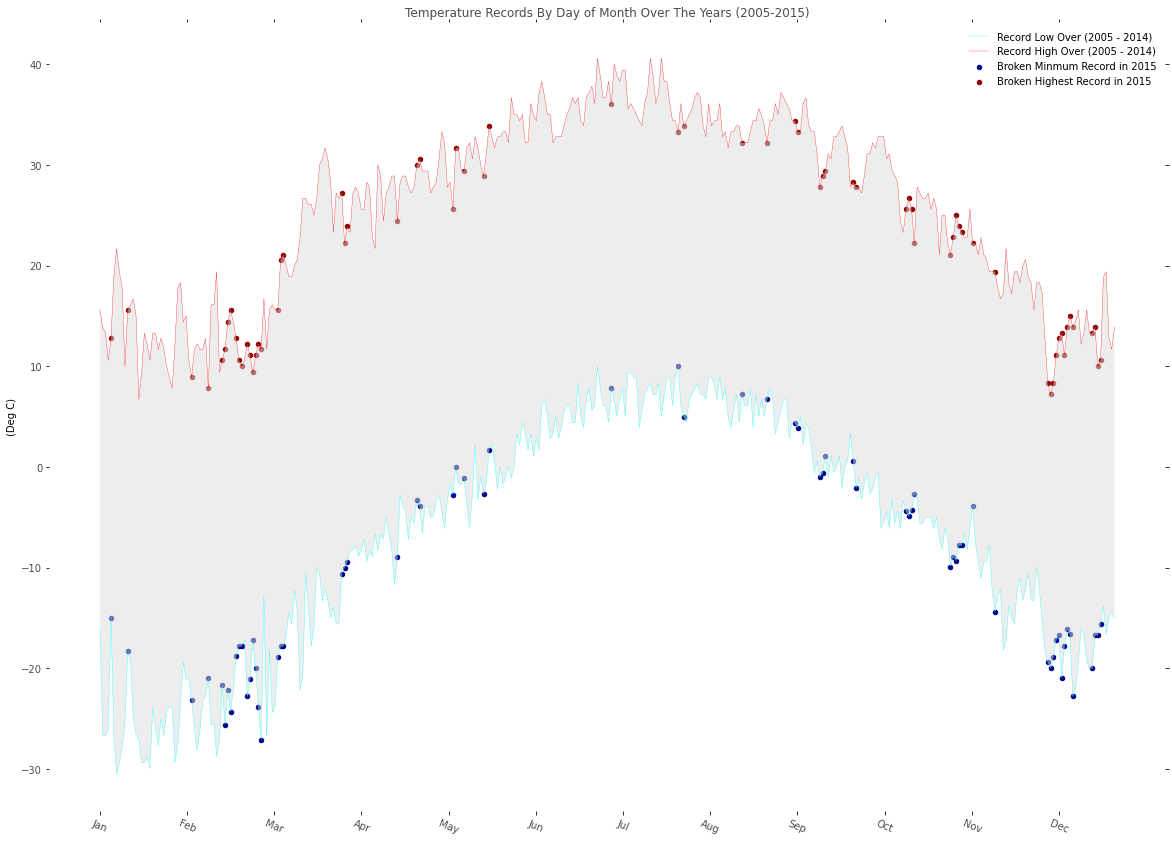

In [16]:
#Plotting With matplotlib
def plot():
    df = data_2005_2014()
    new_df = data_2015()
    min = np.array(df['min'])
    max = np.array(df['max'])
    min2015 = np.array(new_df['min'])
    max2015 = np.array(new_df['max'])
    day = np.array(df['DayOfYear'])
    nday = np.array(new_df['DayOfYear'])
    plt.figure(figsize=(20,15))
    plt.plot(day,min,lw=0.3,c='cyan',label='Record Low Over (2005 - 2014)')
    plt.plot(day,max,lw=0.3,c='red',label='Record High Over (2005 - 2014)')
    plt.scatter(nday,min2015,c='darkblue',marker='o',s=20,label="Broken Minmum Record in 2015")
    plt.scatter(nday,max2015,c='darkred',marker='o',s=20,label="Broken Highest Record in 2015")
    plt.gca().fill_between(day,
                          min,
                          max,
                          facecolor='gainsboro',
                alpha=0.5 )
    ax = plt.gca()

    # Set date axis format
    ax.xaxis.set_major_formatter(dates.DateFormatter('%b-%d'))
    ax.xaxis.set_major_locator(dates.MonthLocator())
    loc, labels = plt.xticks()
    plt.setp(labels, rotation=90)
    
    
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    for spine in plt.gca().spines.values():
        spine.set_visible(False)
    plt.subplots_adjust(bottom=0.15)
    leg=plt.legend(loc='best',frameon=False)
    plt.ylabel('(Deg C)')
    plt.title('Temperature Records By Day of Month Over The Years (2005-2015)',alpha=0.7)

    plt.xticks( np.linspace(0,15 + 30*11 , num = 12), 
            (r'Jan', r'Feb', r'Mar', r'Apr', r'May', r'Jun', r'Jul', r'Aug', r'Sep', r'Oct', r'Nov', r'Dec'),
              alpha =0.7)
    plt.yticks(alpha=0.7)
    plt.tick_params(top='off', left='off', right='off')
    for item in ax.xaxis.get_ticklabels():
        item.set_rotation(-22)
        
    return plt
plot()

In [8]:
#Saving The plot as png image
plt.savefig('Weather Plot.png', format='png')

<IPython.core.display.Javascript object>